In [49]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

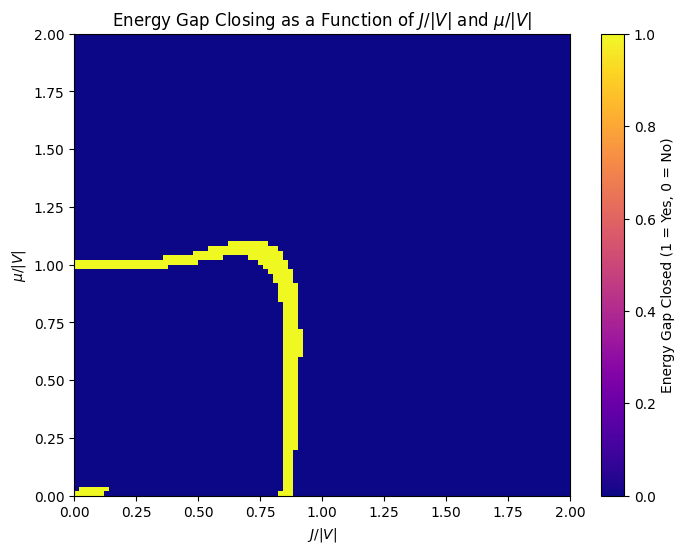

In [64]:
# Constants
N = 2
M = 5
V = 1
J_V_ratios = np.linspace(0, 2, 100)
epsilon = 0.01

# Range for mu/V values
mu_V_values = np.linspace(0, 2, 100)

# Array to store results
energy_gap_closed_matrix = []

# Loop over mu/V values
for mu_V_ratio in mu_V_values:
    energy_gap_closed_array = []
    for J_V_ratio in J_V_ratios:
        hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio, J_V_ratio)
        eigenvalues, _ = exact_diagonalize(hamiltonian)
        eigenvalues = eigenvalues / N
        energy_gap = eigenvalues[1] - eigenvalues[0]

        # Check if energy gap closes
        if energy_gap < epsilon:
            energy_gap_closed_array.append(1)
        else:
            energy_gap_closed_array.append(0)

    energy_gap_closed_matrix.append(energy_gap_closed_array)

energy_gap_closed_matrix = np.array(energy_gap_closed_matrix)

# Create a 2D plot
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.imshow(energy_gap_closed_matrix, extent=[0, 2, 0, 2], aspect='auto', origin='lower', cmap='plasma')

# Add colorbar and labels
fig.colorbar(c, ax=ax, label="Energy Gap Closed (1 = Yes, 0 = No)")
ax.set_xlabel("$J/|V|$")
ax.set_ylabel("$\mu/|V|$")
ax.set_title("Energy Gap Closing as a Function of $J/|V|$ and $\mu/|V|$")
plt.show()
